In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models,Input

In [5]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [7]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [8]:
y_train = y_train.reshape(-1,)
print(y_train[0])

6


In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_image(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

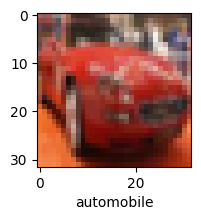

In [11]:
plot_image(X_train,y_train,5)

In [12]:
X_train = X_train/255
X_test = X_test/255

what is layers.flatten in cnn?

Input: Takes a multi-dimensional tensor, such as the output from a pooling layer in a CNN, which can be a 3D feature map (height x width x channels).

Process: Rearranges the elements of the input tensor into a single, long, one-dimensional array. For example, a 3D tensor would be converted into a 1D vector with a size equal to its total number of elements.

Output: Produces a 1D feature vector that can then be fed into the next layer of the neural network.

In [34]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 74ms/step - accuracy: 0.3034 - loss: 1.9275
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 72ms/step - accuracy: 0.4205 - loss: 1.6523
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 72ms/step - accuracy: 0.4485 - loss: 1.5575
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 155s 80ms/step - accuracy: 0.4744 - loss: 1.4945
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.4922 - loss: 1.4392


sparse_categorical---> when y = some number
categorical---> when y is a one-hot encoded vector

In [37]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.4726 - loss: 1.4729


[1.4776581525802612, 0.4724000096321106]

In [39]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step


In [43]:
print("Classification report: \n", classification_report(y_test,y_pred_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.56      0.56      0.56      1000
           1       0.43      0.79      0.55      1000
           2       0.40      0.29      0.34      1000
           3       0.32      0.46      0.38      1000
           4       0.53      0.28      0.36      1000
           5       0.47      0.26      0.33      1000
           6       0.54      0.50      0.52      1000
           7       0.43      0.68      0.53      1000
           8       0.73      0.47      0.57      1000
           9       0.59      0.43      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



very bad model, accuracy only 0.47, now we can see normal neural nets cant provide proper image classification

In [6]:
cnn = models.Sequential([
    #cnn layers
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    #dense network
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [51]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 35ms/step - accuracy: 0.3359 - loss: 2.5386
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.5523 - loss: 1.2733
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.6108 - loss: 1.1181
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.6476 - loss: 1.0045
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 38ms/step - accuracy: 0.6835 - loss: 0.9119


getting an accuracy of 0.6835,literally 1.5 of ann,now we can see why ann's suck in image detection

In [52]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6261 - loss: 1.1111


[1.1261351108551025, 0.6238999962806702]

In [53]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


now tweaking padding and stride

In [13]:
cnn2 = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3),padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3),padding='same'),
    layers.MaxPooling2D((2,2)),
    #dense network
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnn2.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn2.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.3931 - loss: 1.6858
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.6198 - loss: 1.0901
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.6705 - loss: 0.9366
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 49ms/step - accuracy: 0.7021 - loss: 0.8487
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.7259 - loss: 0.7812


In [15]:
cnn2.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6771 - loss: 0.9187


[0.9385406970977783, 0.6758000254631042]

In [16]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = cnn2.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


with same padding, test accuracy has been improved from 0.62 to 0.68